In [1]:
from sklearn import datasets, model_selection, svm, metrics
import numpy as np
import pandas as pd
import threading
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
##Prepare data##

filename=r'phishing.csv'
data_train=pd.read_csv(filename,index_col=None,na_values='?',sep = ';')

data_train=data_train.dropna()
colnames = data_train.columns.get_values()

print("\nDESCRIBE DATA:\n",data_train.describe())
data_train.shape


DESCRIBE DATA:
        having_IP_Address    URL_Length  Shortining_Service  having_At_Symbol  \
count       11055.000000  11055.000000        11055.000000      11055.000000   
mean            0.313795     -0.633198            0.738761          0.700588   
std             0.949534      0.766095            0.673998          0.713598   
min            -1.000000     -1.000000           -1.000000         -1.000000   
25%            -1.000000     -1.000000            1.000000          1.000000   
50%             1.000000     -1.000000            1.000000          1.000000   
75%             1.000000     -1.000000            1.000000          1.000000   
max             1.000000      1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count              11055.000000   11055.000000       11055.000000   
mean                   0.741474      -0.734962           0.063953   
std                    0.671011       0.678139         

C:\Users\Yooru\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  import sys


(11055, 31)

In [59]:
from sklearn.tree import DecisionTreeClassifier
###MAKE DECISION TREE###

#data_train
X_all = data_train.drop(['Result'], axis=1)
y_all = data_train['Result']

test_size=2050
train_size=8050

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, test_size=test_size, train_size=train_size)

### Notes
On default settings on tree makes bit unbalanced classification.
fine tuned min_samples_split value to 1500.
min_samples_leaf value tuning didn't really do nothing special between range 2-100 but if it is increased to 200 balance of the classification gets worse.


In [99]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score,confusion_matrix,f1_score,classification_report

clf = DecisionTreeClassifier(criterion="gini",
                             min_samples_split=1500,
                             min_samples_leaf=50,
                             splitter='best',
                             max_depth=2)
clf.fit(X_train, y_train)
pre = clf.predict(X_test)

accuracy_score = metrics.accuracy_score(y_test, pre)

print("accuracy:", accuracy_score)
cf_matrix = confusion_matrix(y_test, pre)
print()

print(pd.crosstab(y_test, pre, rownames=['True'], colnames=['Predicted'], margins=True),"\n")

print(classification_report(y_test,pre))

accuracy: 0.9121951219512195

Predicted   -1     1   All
True                      
-1         840    80   920
1          100  1030  1130
All        940  1110  2050 

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       920
           1       0.93      0.91      0.92      1130

    accuracy                           0.91      2050
   macro avg       0.91      0.91      0.91      2050
weighted avg       0.91      0.91      0.91      2050



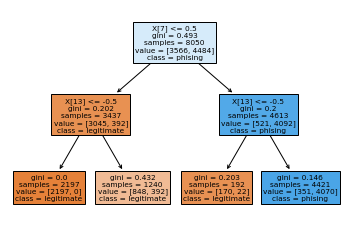

In [57]:
from sklearn.tree import plot_tree
import graphviz
plt.figure()
plot_tree(clf, filled=True,class_names = ['legitimate','phising'])
plt.show()

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf, out_file='tree.dot', 
                feature_names = colnames[:30],
                class_names = ['legitimate','phising'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

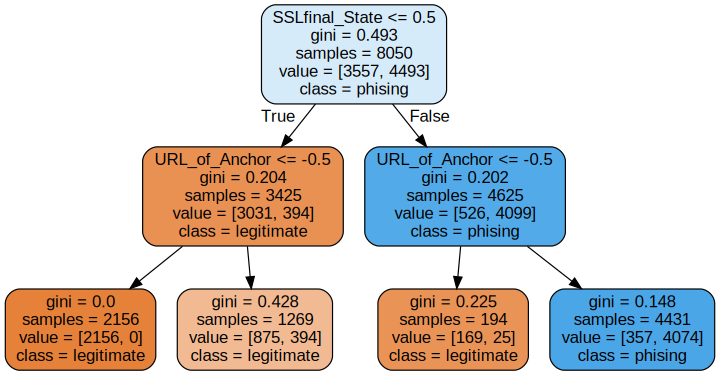

In [100]:
##Edited plot
import pydotplus
import pydot
import graphviz

#Without this graphviz executables not found
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

tree_data = export_graphviz(clf, feature_names=colnames[:30], out_file=None,class_names = ['legitimate','phising'], filled=True, rounded=True)
tree_graph = pydotplus.graph_from_dot_data(tree_data)

tree_graph.set_size('"10,10!"')
tree_graph.write_png('img_treeDot.png')
#tree_graph.write_pdf("pdf_treeDot.pdf")  

graphviz_graph = graphviz.Source(tree_graph.to_string())
graphviz_graph